<a href="https://colab.research.google.com/github/ElAruspice/proyecto_sapiencia/blob/main/Copia_de_Trabajo_final_redes_neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="left">
<p><img alt="Sapiencia" height="140px" src="https://ubicua.ingeniaudea.co/pluginfile.php/32974/coursecat/description/RF_RedesNeuronales.png" align="left" hspace="10px" vspace="0px"></p></div>
<div align="left"></div>
<div>

<br></br>

<div align="left">
<br></br>
<br></br>



<hr size=10 noshade color="#663398">
</p>

<div align="right">
<h1> <b> Trabajo final redes neuronales </b> </h1>
<br>


**El presente material hace parte de la ruta de formación del talento especializado de SAPIENCIA**

**Los documentos que utilizaremos en la presente y proximas clases son una mezcla del trabajo de muchos profesores y académicos.**

**En caso de utilizar el presente contenido favor citarlo y brindar los créditos respectivos.**


<h1>Integrantes

Jhone Esteban Velasquez

Geiver Alberto Zabala

Alberto Náder




#**Descripción trabajo final**

<p>
  1. Analizar el código paso a paso y entenderlo y realizar una breve explicación de como funciona.<br>
  2. Realizar módificaciones variando parámetros como la cantidad de neuronas, tipo de optimizador, funciones de activación, funciones de perdida y tamaños de entrada de la imagen.<br>
  3. A partir del entendimiento del código en el punto 1 responda las siguientes preguntas: <br>
  <ul>
    <li> ¿Cual es el objetivo de categorizar los targets o labels correspondientes a cada imagen? </li>
    <li> ¿En que me ayuda la normalización a la hora de entrenar los datos? </li>
  </ul>
  <p>
  4. Realice un informe detallando los resultados obtenidos en el punto 2. El informe debe responder las siguiente preguntas:
  <ul>
    <li> ¿Cómo variaron los resultados con el aumento o disminución de las neuronas?</li>
    <li> ¿Cómo cambia la presición del modelo propuesto, al cambiar la función de activación, que se logra observar de los resultados?</li>
    <li> ¿Cuál sería a su criterio la función de activación que se adapta al presente análisis ?</li>
    <li> ¿Cómo se comportaron los resultados de las funciones de perdidas analizadas?</li>
    <li> ¿Mejoraron los resultados al reducir o aumentar el tamaño de entrada de la imagen?</li>
    <li> ¿Cuál fue la mejor solución que logró encontrar y por qué?</li>

  </ul>

  Nota: El informe debe llevar los valores que probaron en el módelo y para lo cuál como minimo se deben analizar 4 optimizadores,4 funciones de activación, 4 funciones de perdida, 4 opciones de neuronas y tamaños de entrada de la imagen. <br>
<p>
  5. Concluir en que casos se debe utilizar los optimizadores,funciones de perdida, funciones de activación y tener en cuenta que se debe presentar una gráfica representativa de cada función de activación describiendo los rangos de la función y su comportamiento.
</p>

##**Porcentajes de calificación:**


1.   Punto 1 : 10%
2.   Punto 2 : 10%
3.   Punto 3 : 10%
4.   Punto 4 : 25%
5.   Punto 5 : 15%
6.   Sustentación : 30%


##**Limitantes**
   Grupos máximo de 3 personas y mínimo de 2 personas


---

Para iniciar, se instalan las librerías requeridas para el ejercicio propuesto:

In [ ]:
pip install tensorflow

In [ ]:
pip install keras

Las bibliotecas TensorFlow y  Keras en Python son ampliamente utilizadas para el aprendizaje profundo. Mientras Tensorflow se encarga de ejecutar los gráficos de forma ágil, keras facilita la creación de modelos de aprendizaje profundo en Python.

In [ ]:
import numpy as np
from keras import layers, models
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd

A continuación, se procede a instalar los módulos dentro de las bibliotecas mencionadas.

**Import numpy as np →** Importa la biblioteca NumPy y la renombra como "np", que se utiliza para el cálculo de operaciones numéricas eficientes.


**From keras impor layers, models →** Importa módulos relacionados con la creación de modelos de aprendizaje profundo utilizando Keras.


**from keras.utils import to_categorical →** importa una función que convierte etiquetas en one-hot enconding. Ej. Al ingresar el número 3 se obtiene el siguiente vector:  [0,0,0,1,0,0,0,0,0,0]

**Mnist** (Modified National Institute of Standards and Technology database): Contiene un conjunto de entrenamiento de 60.000 imágenes de dígitos manuscritos (de 0 a 9) y otro conjunto de pruebas con 10.000 muestras adicionales.

**Matplotlib**: Biblioteca utilizada para crear gráficos y visualizaciones.

**Pandas:** Biblioteca de código abierto utilizada en Python para cargar, alinear, manipular o incluso fusionar conjuntos de datos.


In [ ]:
(train_data, train_labels), (test_data, test_labels) =mnist.load_data()
# Aplana las imágenes y conviértelas en un DataFrame
train_data_flattened = train_data.reshape(train_data.shape[0], -1)
train_data_df = pd.DataFrame(train_data_flattened)

11490434/11490434 [==============================] - 0s 0us/step


**(train_data, train_labels), (test_data, test_labels) =mnist.load_data()**

Esta linea de código carga los datos de entrenamiento de acuerdo a la imágen a evaluar por medio de train_data y train_label, así como los datos de prueba y aprendizaje por medio de test_data y test_label. Esto permite entrenar y evaluar modelos de clasificación para el reconocimiento de dígitos mano a mano.


**train_data_flattened = train_data.reshape(train_data.shape[0], -1)**

Esta línea de código toma el conjunto de datos de entrenamiento train_data, que contiene imágenes tridimensionales y las convierte o aplana en una matriz bidimensional. La forma resultante de train_data_flattened será (60000, 28 * 28), lo que significa que tendrás una matriz con 60000 filas (una por cada imagen) y 784 columnas (una por cada píxel en una imagen 28x28).


**train_data_df = pd.DataFrame(train_data_flattened)**

Convierte los datos de entrenamiento a un Dataframe utilizando la biblioteca Pandas. Un dataframe es una estructura de datos tabular que facilita la manipulación y el análisis de datos.



In [ ]:
train_data

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Cuando se carga el conjunto de datos **MNIST**, la variable **train_data** contendrá una matriz tridimensional que almacena las imágenes de los dígitos.

La forma típica de esta matriz es (número de imágenes, altura de imagen, ancho de imagen). Se tiene 60,000 imágenes en el conjunto de entrenamiento y cada imagen es de 28x28 píxeles, train_data será una matriz con una forma de (60000, 28, 28).
:

In [ ]:
train_data_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Se imprimen las 10 primeras filas del dataframe train_data_df

In [ ]:
train_data_df.shape

(60000, 784)

Trae la dimensión del dataframe train_data_df, la cual posee  60.000 filas y 784 columnas.

In [ ]:
train_data.shape

(60000, 28, 28)

Trae la dimensión de la matriz train_data, donde tenemos una matriz con 60.000 imágenes, cada una tiene 28 filas y 28 columnas, cada uno de estos elementos va de 0 a 255 representando el color del pixel.

In [ ]:
train_data_df[0]

0        0
1        0
2        0
3        0
4        0
        ..
59995    0
59996    0
59997    0
59998    0
59999    0
Name: 0, Length: 60000, dtype: uint8

Imprime la primera columna del dataframe train_data_df, la cual corresponde al primer píxel de cada imagen.

In [ ]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  


Imprime una matriz de dimensión 28 * 28, la cual representa la primera imagen del train_data ya que se seleccionó el primer elemento con [0].

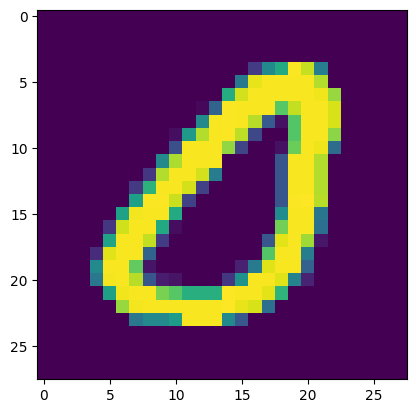

In [ ]:
plt.imshow(train_data[689])

El alias **plt** se refiere a la biblioteca Matplotlib, que se utiliza para crear gráficos y visualizaciones en Python. train_data[689] accede a la imagen número 689 en el conjunto de datos de entrenamiento MNIST. La notación train_data[689] significa que estamos tomando la imagen número 689 de la matriz train_data. La función **imshow** toma esta imagen y la muestra en una ventana gráfica. Se puede verificar cómo se ve la imagen número 689 en el conjunto de datos. Esto es útil para la visualización y la inspección de datos cuando trabajas con conjuntos de datos de imágenes, como MNIST.

In [ ]:
train_labels[689]

0


Imprime la etiqueta o valor al cual corresponde la imagen en la posición 689


In [ ]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))

Inicializa el modelo de red neuronal utilizando la biblioteca Keras. Se crean 2 capas de redes neuronales donde fluyen los datos en una sola dirección, ya que se definió un modelo secuencial.
La primer capa tiene 28*28 neuronas de entrada y 512 neuronas de salida, esta tiene una función de activación ‘relu’.
La segunda capa tiene 10 neuronas de salida, de acuerdo con el rango en cada valor de 0 a 9. Por último esta capa utiliza la función de activación ‘softmax’


In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision'])

**model.compile():** Este método compila el modelo antes de comenzar el proceso de entrenamiento, se le ingresan los siguientes parámetros:

- **optimizer='rmsprop'**: Se especifica el optimizador que se utilizará durante el entrenamiento. En este caso, se usa el optimizador 'rmsprop'. Los optimizadores son algoritmos que ajustan los pesos de la red durante el proceso de entrenamiento para minimizar la función de pérdida.

- **loss='categorical_crossentropy'**: Se especifica la función de pérdida que se utilizará para medir el rendimiento del modelo durante el entrenamiento. 'Categorical Crossentropy' es una función de pérdida comúnmente utilizada en problemas de clasificación multi-clase, como el reconocimiento de dígitos en MNIST.

- **metrics=['accuracy', 'Precision']:** Se especifican las métricas que se utilizarán para evaluar el rendimiento del modelo. En este caso, se utiliza 'accuracy' (exactitud) y 'Precision' como métricas. 'Accuracy' mide la fracción de ejemplos clasificados correctamente, mientras que 'Precision' se refiere a la capacidad del modelo de no etiquetar incorrectamente una muestra como positiva.


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Ofrece un resumen de la construcción de la red neuronal

In [ ]:
x_train = train_data_df
#x_train = train_data.reshape((60000,28*28))
x_train = x_train.astype('float32')/255

x_test = test_data.reshape((10000,28*28))
x_test = x_test.astype('float32')/255

**x_train = train_data_df** → Asigna los datos de entrenamiento que se habían almacenado previamente en un DatfFrame llamado train_data_df a la variable x_train. Esto implica que x_train contiene las imágenes de entrenamiento aplanadas en formato DataFrame.

**x_train = x_train.astype('float32')/255 →** Convierte los valores de píxeles en x_train al tipo de dato 'float32' para garantizar que sean números flotantes. Luego, divide cada valor de píxel por 255. Esta operación normaliza los valores de píxeles a un rango entre 0 y 1, ya que en imágenes, los píxeles suelen tener valores en el rango de 0 a 255




Por consiguiente, el ***test_data*** se “reorganiza” o remodela por medio del método **reshape**, transformando en un conjunto de datos de tipo float. Luego se divide cada valor x_test por 255, representando una escala en la cual 0 es la oscuridad máxima y 255 la mayor intensidad en la imagen.



In [ ]:
x_train[0]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
59995    0.0
59996    0.0
59997    0.0
59998    0.0
59999    0.0
Name: 0, Length: 60000, dtype: float32

Imprime los datos normalizados en la columna 1 del dataframe x_train

In [ ]:
y_train = to_categorical(train_labels)
y_test =to_categorical(test_labels)

**y_train = to_categorical(train_labels) →** Convierte las etiquetas de clase del conjunto de datos de entrenamiento (**train_labels**) en formato "one-hot encoding". En MNIST, hay 10 clases correspondientes a los dígitos del 0 al 9. El *one-hot encoding* convierte estas etiquetas en vectores binarios, donde un 1 se coloca en la posición correspondiente a la clase y todas las demás posiciones se establecen en 0. Por ejemplo, si una imagen contiene el dígito "3", la etiqueta se convierte en [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].

**y_test** = to_categorical(test_labels): Realiza la misma conversión para las etiquetas de clase del conjunto de datos de prueba (test_labels).


In [ ]:
train_labels[0]

5

Imprime el valor de la etiqueta para la imagen en la posición 0, este imprime 5.

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

imprime la posición en formato “one-hot encoding” de acuerdo a la categoría establecida en el entrenamiento

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 8s 16ms/step - loss: 0.2654 - accuracy: 0.9223 - precision: 0.9515 - val_loss: 0.1252 - val_accuracy: 0.9636 - val_precision: 0.9711
Epoch 2/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1075 - accuracy: 0.9681 - precision: 0.9740 - val_loss: 0.0927 - val_accuracy: 0.9728 - val_precision: 0.9767
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0716 - accuracy: 0.9789 - precision: 0.9822 - val_loss: 0.0805 - val_accuracy: 0.9758 - val_precision: 0.9786
Epoch 4/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0520 - accuracy: 0.9843 - precision: 0.9865 - val_loss: 0.0782 - val_accuracy: 0.9742 - val_precision: 0.9779
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0387 - accuracy: 0.9885 - precision: 0.9902 - val_loss: 0.0641 - val_accuracy: 0.9813 - val_precision: 0.9829
Epoch 6/10
469/469 [==============================] - 6s 13ms/ste

**history = model.fit() →** Inicia el proceso de entrenamiento del modelo y guarda la información relacionada con el proceso de entrenamiento en un objeto llamado history.

**x_train y y_train →** Los datos de entrenamiento (x_train) y las etiquetas de clase correspondientes (y_train) se utilizan para entrenar el modelo. x_train contiene las imágenes de entrenamiento preprocesadas y y_train contiene las etiquetas de clase en formato "one-hot encoding".

**Epochs=10 →** Establece el número de épocas de entrenamiento. Una época es una pasada completa a través de todo el conjunto de datos de entrenamiento. En otras palabras, es el número de iteraciones transcurridas entre los datos.
En este caso, se entrena el modelo durante 10 épocas, lo que significa que pasará 10 veces por el conjunto de entrenamiento para ajustar los pesos de la red.

- Como dato de observación, dada la capacidad y el apoyo de procesamiento en el entorno de Google Colabs, se puede deducir que el análisis y los cálculos lineales realizados internamente en el entrenamiento usando 512 neuronas de entrada, tarda en promedio ***5,6*** segundos en el transcurso de cada época. A esto lo vamos a llamar **Rendimiento**.

**batch_size=128 →** Establece el tamaño del lote (batch size) para el entrenamiento. Durante el entrenamiento, el modelo no ajusta los pesos con cada muestra individual, sino con lotes de muestras. En este caso, se utilizan lotes de 128 muestras a la vez.

**validation_data=(x_test, y_test) →** Utiliza los datos de prueba (x_test y y_test) como datos de validación para evaluar el rendimiento del modelo durante el entrenamiento.


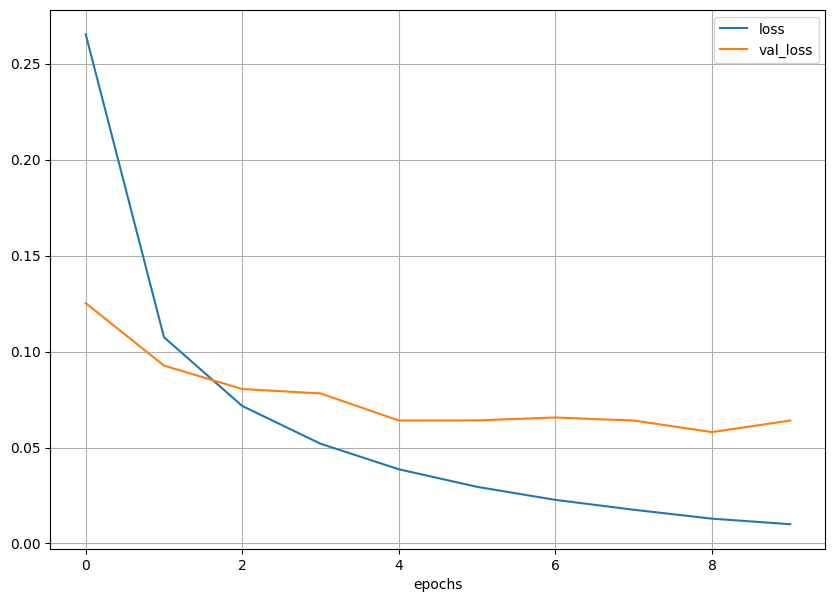

In [ ]:

pd.DataFrame({'loss': history.history['loss'],
              'val_loss': history.history['val_loss']}).plot(figsize=(10, 7))

plt.grid(True)
plt.xlabel("epochs")
plt.show()


Se crea un Dataframe de la biblioteca Pandas . En éste se aloja un Diccionario de dos campos clave-valor.  la clave **“loss”**  se asigna a los valores de pérdida en el conjunto de entrenamiento, y la clave "**val_loss**" se asigna a los valores de pérdida en el conjunto de validación. Estas columnas se llenan con los valores de pérdida registrados durante el entrenamiento y la validación, respectivamente. Al final, se usa **“plot”** para trazar las curvas de las pérdidas en el entrenamiento, estableciendo un tamaño de 10 pulgadas de ancho por 7 de alto.

Esto es útil para evaluar el rendimiento del modelo en datos no vistos y para identificar si el modelo está sobre-ajustado o sub-ajustado. Si la pérdida de validación disminuye a medida que avanzan las épocas, el modelo está aprendiendo correctamente. Si la pérdida de validación aumenta o se estabiliza, podría ser un indicio de que el modelo no está generalizando bien y necesita ajustes.


Mediante la librería Matplotlib se traza una cuadricula en el grafico ya interpuesto.

**plt.grid(True) →** Activa la cuadrícula en el gráfico, agregando los parámetros del eje X y el eje Y en un plano, facilitando la lectura de los valores en el gráfico así como la posición de los puntos o las curvas con mayor precisión.

**plt.xlabel(“epochs”) →**.Establece una etiqueta del eje X en el gráfico. En este caso, la etiqueta es “epochs”, lo que indica que el eje X representa las épocas en el contexto del entrenamiento del aprendizaje automático.

**plt.show()→** muestra el gráfico en la pantalla.


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0641 - accuracy: 0.9817 - precision: 0.9825


[0.06405500322580338, 0.9817000031471252, 0.9824807047843933]

En este caso, la pérdida es 0.0 y  la precisión es 0.9805, lo que significa que el modelo clasifica correctamente aproximadamente el 98.13% de las muestras en el conjunto de prueba.

El valor de la métrica de precisión en el conjunto de datos de prueba. En este caso, la precisión es 0.9827.


 <H3>3. A partir del entendimiento del código en el punto 1 responda las siguientes preguntas:


  <br>
  <ul>
    <li> ¿Cual es el objetivo de categorizar los targets o labels correspondientes a cada imagen? </li>
  </ul>
  <p>

**R/**

El objetivo de categorizar los "targets" o etiquetas correspondientes a cada imagen en un problema de machine learning o deed learning, especialmente en problemas de clasificación, es permitir que el modelo aprenda a realizar predicciones precisas y asignar cada entrada (en este caso, una imagen) a una de las categorías predefinidas.(en este caso, número entre 0 y 9)

<br>
  <ul>
    <li> ¿En que me ayuda la normalización a la hora de entrenar los datos? </li>
  </ul>
  <p>

**R/**

La normalización es una técnica crucial en el preprocesamiento de datos antes de entrenar una red neuronal y ofrece varios beneficios fundamentales para el proceso de entrenamiento. Entre sus beneficios, se encuentran los siguientes:

- La normalización de los datos suele hacer que el proceso de entrenamiento converja más rápido. Cuando los datos de entrada tienen una escala más consistente, los gradientes durante la retropropagación son más estables y, por lo tanto, el modelo converge a una solución más rápidamente.

- Ayuda a mitigar problemas numéricos al escalar los datos de manera que todos tengan una margen similar (por ejemplo, entre 0 y 1 o con una media cero y desviación estándar uno)  manteniendo los valores dentro de rangos más manejables. Esto también beneficia a mejorar la capacidad del modelo de generalizar a datos no vistos

- Puede hacer que el entrenamiento de redes profundas sea más estable y menos propenso a oscilaciones o comportamientos indeseados.

<h3>2. Realizar modificaciones variando parámetros</h3> como la cantidad de neuronas, tipo de optimizador, funciones de activación, funciones de pérdida y tamaños de entrada de la imagen.


<H4> MODIFICACIÓN DE NEURONAS

<h4> Modificación 1: </h4>

- Cantidad de neuronas: **200**
- Tipo de optimizador: rmsprop
- Funciones de activación: relu, softmax
- Funciones de pérdida: categorical_crossentropy
- Tamaños de entrada de la imagen: 28*28


In [ ]:
model = models.Sequential()
model.add(layers.Dense(200,activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision'])

Se procede a verificar en el resumen:

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 200)               157000    
                                                                 
 dense_3 (Dense)             (None, 10)                2010      
                                                                 
Total params: 159010 (621.13 KB)
Trainable params: 159010 (621.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Una vez verificados los datos, se procede a realizar el entrenamiento neuronal.

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 0.3083 - accuracy: 0.9135 - precision: 0.9494 - val_loss: 0.1653 - val_accuracy: 0.9531 - val_precision: 0.9638
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1370 - accuracy: 0.9603 - precision: 0.9690 - val_loss: 0.1094 - val_accuracy: 0.9681 - val_precision: 0.9739
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0953 - accuracy: 0.9718 - precision: 0.9768 - val_loss: 0.0953 - val_accuracy: 0.9721 - val_precision: 0.9777
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0722 - accuracy: 0.9787 - precision: 0.9824 - val_loss: 0.0815 - val_accuracy: 0.9746 - val_precision: 0.9782
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0574 - accuracy: 0.9832 - precision: 0.9858 - val_loss: 0.0777 - val_accuracy: 0.9766 - val_precision: 0.9795
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - lo

Por ultimo, se procede con la generación de la gráfica y la evaluación final del modelo.

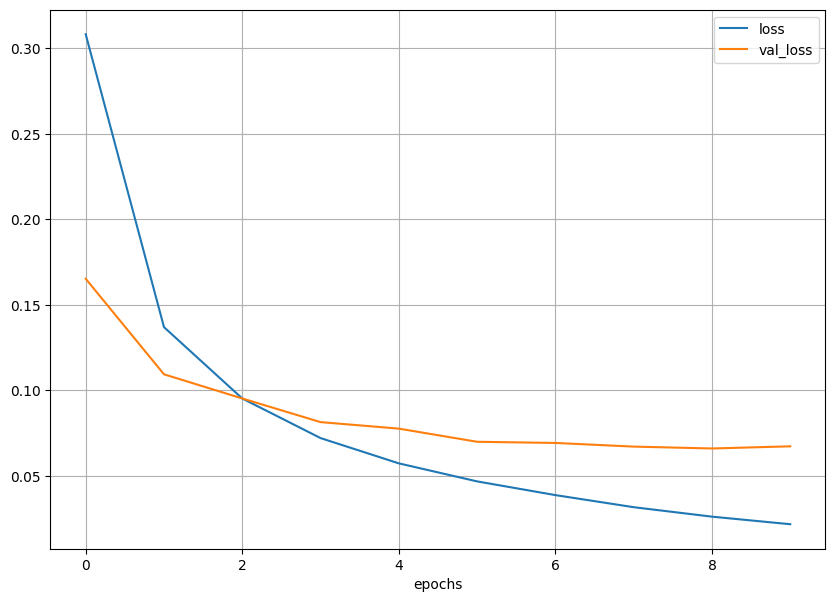

313/313 [==============================] - 1s 2ms/step - loss: 0.0673 - accuracy: 0.9805 - precision: 0.9821


[0.06732912361621857, 0.9804999828338623, 0.9820569157600403]

In [ ]:
pd.DataFrame({'loss': history.history['loss'],
              'val_loss': history.history['val_loss']}).plot(figsize=(10, 7))

plt.grid(True)
plt.xlabel("epochs")
plt.show()

model.evaluate(x_test, y_test)

Resultado de las métricas:

Loss = 0.673 ; Accuracy = 0.9805 ; Precisión = 0.9821 ; Promedio del tiempo de procesamiento en cada Epoca
(Rendimiento) = 3.3 segundos


<h4> Modificación 2: </h4>

- Cantidad de neuronas: **80**
- Tipo de optimizador: rmsprop
- Funciones de activación: relu, softmax
- Funciones de pérdida: categorical_crossentropy
- Tamaños de entrada de la imagen: 28*28

In [ ]:
model = models.Sequential()
model.add(layers.Dense(80,activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 80)                62800     
                                                                 
 dense_9 (Dense)             (None, 10)                810       
                                                                 
Total params: 63610 (248.48 KB)
Trainable params: 63610 (248.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.3722 - accuracy: 0.8989 - precision: 0.9443 - val_loss: 0.2217 - val_accuracy: 0.9366 - val_precision: 0.9509
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1872 - accuracy: 0.9465 - precision: 0.9589 - val_loss: 0.1553 - val_accuracy: 0.9547 - val_precision: 0.9647
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1402 - accuracy: 0.9599 - precision: 0.9686 - val_loss: 0.1219 - val_accuracy: 0.9634 - val_precision: 0.9707
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1129 - accuracy: 0.9678 - precision: 0.9740 - val_loss: 0.1118 - val_accuracy: 0.9667 - val_precision: 0.9721
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0946 - accuracy: 0.9730 - precision: 0.9777 - val_loss: 0.1032 - val_accuracy: 0.9683 - val_precision: 0.9731
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - lo

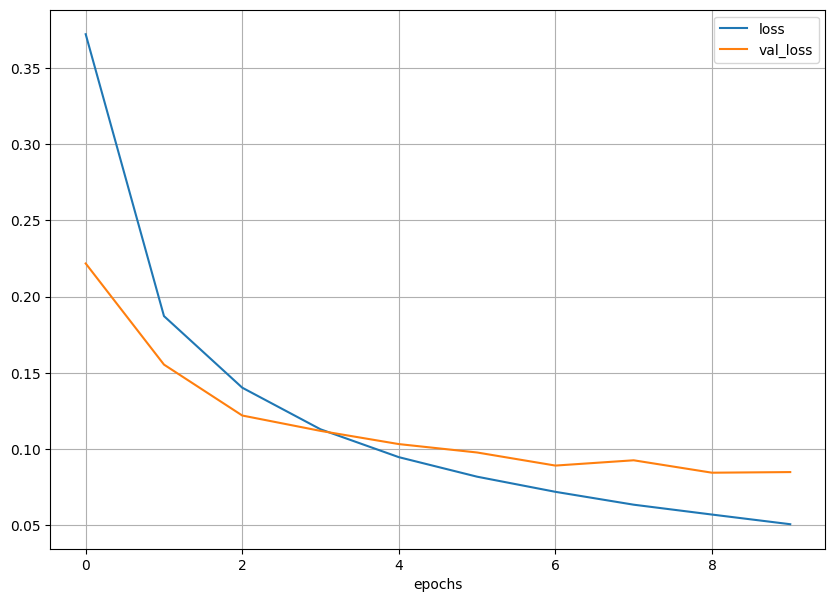

313/313 [==============================] - 1s 2ms/step - loss: 0.0848 - accuracy: 0.9754 - precision: 0.9784


[0.0847993940114975, 0.9753999710083008, 0.9783854484558105]

In [ ]:
pd.DataFrame({'loss': history.history['loss'],
              'val_loss': history.history['val_loss']}).plot(figsize=(10, 7))

plt.grid(True)
plt.xlabel("epochs")
plt.show()

model.evaluate(x_test, y_test)

Resultado de las métricas:

Loss = 0.848 ;
Accuracy = 0.9754 ;
Precisión = 0.9784 ;
Rendimiento = 2.5 segundos


<h3>Modificación 3</h3>

- Cantidad de neuronas: **850**
- Tipo de optimizador: rmsprop
- Funciones de activación: relu, softmax
- Funciones de pérdida: categorical_crossentropy
- Tamaños de entrada de la imagen: 28*28

In [ ]:
model = models.Sequential()
model.add(layers.Dense(850,activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 850)               667250    
                                                                 
 dense_11 (Dense)            (None, 10)                8510      
                                                                 
Total params: 675760 (2.58 MB)
Trainable params: 675760 (2.58 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 9s 18ms/step - loss: 0.2516 - accuracy: 0.9258 - precision: 0.9527 - val_loss: 0.1265 - val_accuracy: 0.9607 - val_precision: 0.9675
Epoch 2/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0956 - accuracy: 0.9715 - precision: 0.9764 - val_loss: 0.0833 - val_accuracy: 0.9742 - val_precision: 0.9787
Epoch 3/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0616 - accuracy: 0.9817 - precision: 0.9844 - val_loss: 0.0828 - val_accuracy: 0.9731 - val_precision: 0.9766
Epoch 4/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0431 - accuracy: 0.9871 - precision: 0.9887 - val_loss: 0.0634 - val_accuracy: 0.9792 - val_precision: 0.9814
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0318 - accuracy: 0.9902 - precision: 0.9913 - val_loss: 0.0678 - val_accuracy: 0.9789 - val_precision: 0.9808
Epoch 6/10
469/469 [==============================] - 8s 18ms/ste

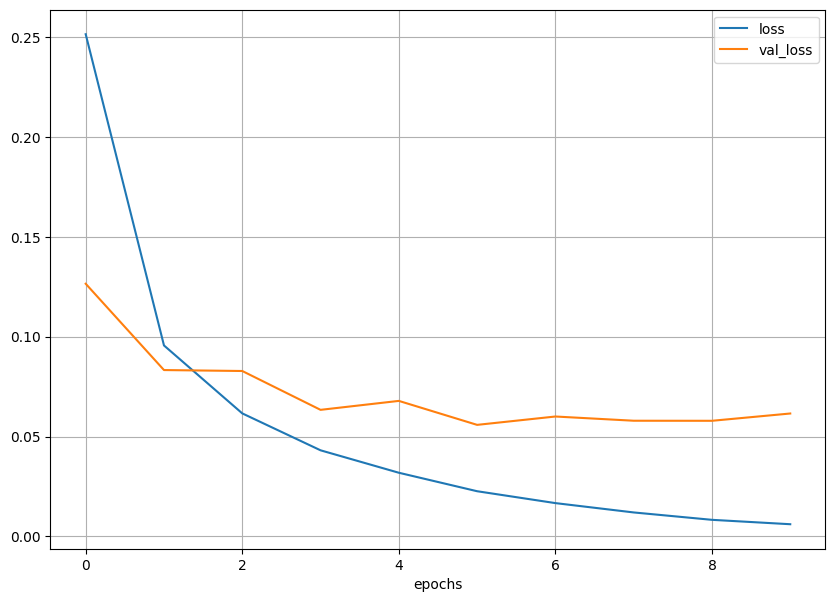

313/313 [==============================] - 1s 4ms/step - loss: 0.0615 - accuracy: 0.9827 - precision: 0.9837


[0.061525531113147736, 0.982699990272522, 0.9836755394935608]

In [ ]:
pd.DataFrame({'loss': history.history['loss'],
              'val_loss': history.history['val_loss']}).plot(figsize=(10, 7))

plt.grid(True)
plt.xlabel("epochs")
plt.show()

model.evaluate(x_test, y_test)

Resultado de métricas:

Loss = 0.615 ;
Accuracy = 0.9827 ;
Precisión = 0.9837 ;
Rendimiento = 7.8 segundos


<h3>Modificación 4</h3>

Cantidad de neuronas: **1200**

Tipo de optimizador: rmsprop

Funciones de activación: relu, softmax

Funciones de pérdida: categorical_crossentropy

Tamaños de entrada de la imagen: 28*28

In [ ]:
model = models.Sequential()
model.add(layers.Dense(1200,activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision'])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1200)              942000    
                                                                 
 dense_13 (Dense)            (None, 10)                12010     
                                                                 
Total params: 954010 (3.64 MB)
Trainable params: 954010 (3.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 11s 22ms/step - loss: 0.2351 - accuracy: 0.9303 - precision: 0.9544 - val_loss: 0.1129 - val_accuracy: 0.9645 - val_precision: 0.9712
Epoch 2/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0898 - accuracy: 0.9730 - precision: 0.9771 - val_loss: 0.0912 - val_accuracy: 0.9704 - val_precision: 0.9756
Epoch 3/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0583 - accuracy: 0.9823 - precision: 0.9849 - val_loss: 0.0664 - val_accuracy: 0.9798 - val_precision: 0.9827
Epoch 4/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0397 - accuracy: 0.9877 - precision: 0.9893 - val_loss: 0.0576 - val_accuracy: 0.9829 - val_precision: 0.9845
Epoch 5/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0277 - accuracy: 0.9920 - precision: 0.9927 - val_loss: 0.0625 - val_accuracy: 0.9796 - val_precision: 0.9813
Epoch 6/10
469/469 [==============================] - 10s 22m

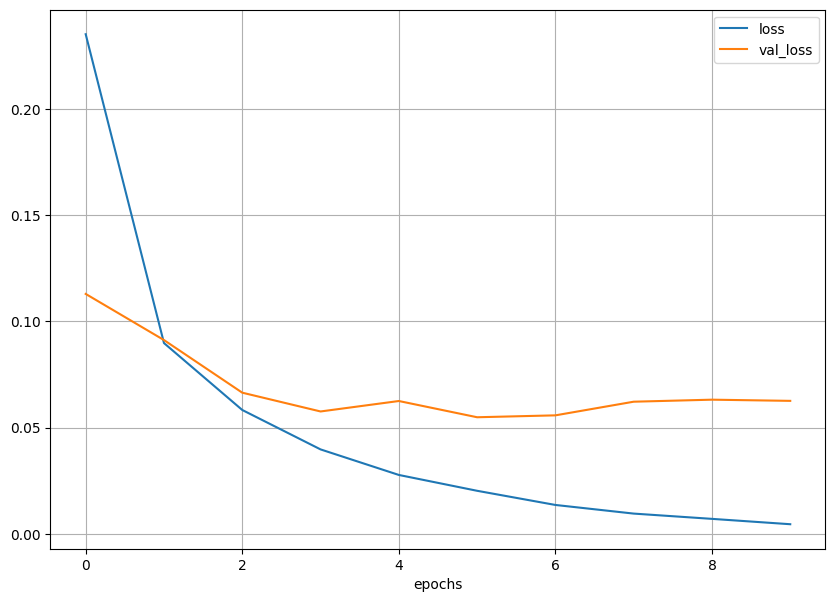

313/313 [==============================] - 2s 5ms/step - loss: 0.0626 - accuracy: 0.9825 - precision: 0.9831


[0.06256486475467682, 0.9825000166893005, 0.9830796718597412]

In [ ]:
pd.DataFrame({'loss': history.history['loss'],
              'val_loss': history.history['val_loss']}).plot(figsize=(10, 7))

plt.grid(True)
plt.xlabel("epochs")
plt.show()

model.evaluate(x_test, y_test)

Resultado de las métricas:

Loss = 0.626 ;
Accuracy = 0.9825 ;
Precisión = 0.9831 ;
Rendimiento = 10.1 segundos


# Modificaciones de optimizadores

### Optimizador sgd
- Cantidad de neuronas: 512
- Tipo de optimizador: **sgd**
- Funciones de activación: relu, softmax
- Funciones de pérdida: categorical_crossentropy
- Tamaños de entrada de la imagen: 28*28

In [ ]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision'])

In [ ]:
x_train = train_data_df
#x_train = train_data.reshape((60000,28*28))
x_train = x_train.astype('float32')/255

x_test = test_data.reshape((10000,28*28))
x_test = x_test.astype('float32')/255

In [ ]:
y_train = to_categorical(train_labels)
y_test =to_categorical(test_labels)

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 1.1029 - accuracy: 0.7526 - precision: 0.9735 - val_loss: 0.5930 - val_accuracy: 0.8662 - val_precision: 0.9642
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.5188 - accuracy: 0.8727 - precision: 0.9517 - val_loss: 0.4321 - val_accuracy: 0.8914 - val_precision: 0.9507
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.4199 - accuracy: 0.8902 - precision: 0.9442 - val_loss: 0.3743 - val_accuracy: 0.9009 - val_precision: 0.9468
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.3750 - accuracy: 0.8993 - precision: 0.9426 - val_loss: 0.3420 - val_accuracy: 0.9092 - val_precision: 0.9470
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3476 - accuracy: 0.9050 - precision: 0.9418 - val_loss: 0.3212 - val_accuracy: 0.9134 - val_precision: 0.9472
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - 

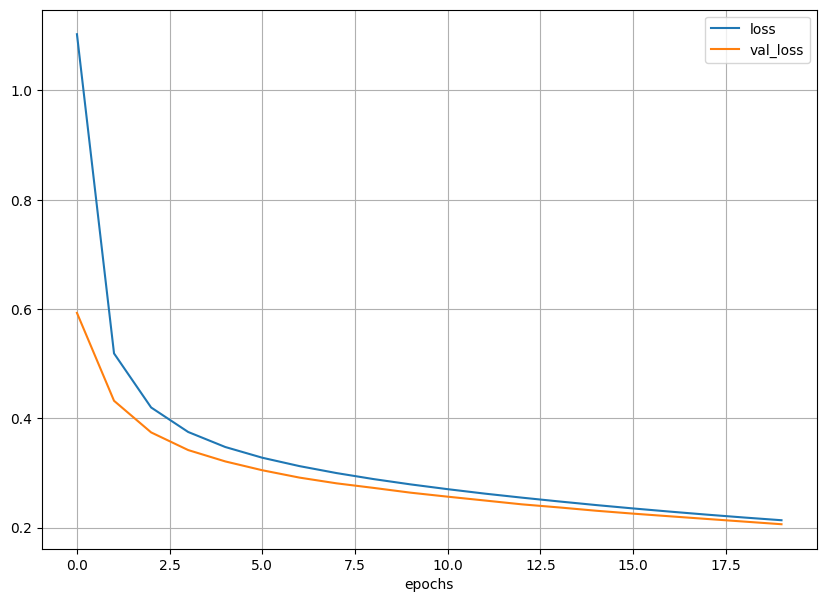

In [ ]:
pd.DataFrame({'loss': history.history['loss'],
              'val_loss': history.history['val_loss']}).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel("epochs")
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2063 - accuracy: 0.9418 - precision: 0.9586


[0.2062648981809616, 0.9417999982833862, 0.9586006999015808]

### Optimizador adam
- Cantidad de neuronas: 512
- Tipo de optimizador: **adam**
- Funciones de activación: relu, softmax
- Funciones de pérdida: categorical_crossentropy
- Tamaños de entrada de la imagen: 28*28

In [ ]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision'])

In [ ]:
x_train = train_data_df
#x_train = train_data.reshape((60000,28*28))
x_train = x_train.astype('float32')/255

x_test = test_data.reshape((10000,28*28))
x_test = x_test.astype('float32')/255

In [ ]:
y_train = to_categorical(train_labels)
y_test =to_categorical(test_labels)

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 7s 12ms/step - loss: 0.2682 - accuracy: 0.9237 - precision: 0.9523 - val_loss: 0.1464 - val_accuracy: 0.9547 - val_precision: 0.9625
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1084 - accuracy: 0.9692 - precision: 0.9753 - val_loss: 0.0922 - val_accuracy: 0.9730 - val_precision: 0.9775
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0691 - accuracy: 0.9794 - precision: 0.9832 - val_loss: 0.0753 - val_accuracy: 0.9779 - val_precision: 0.9812
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0498 - accuracy: 0.9851 - precision: 0.9875 - val_loss: 0.0688 - val_accuracy: 0.9790 - val_precision: 0.9821
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0353 - accuracy: 0.9899 - precision: 0.9918 - val_loss: 0.0706 - val_accuracy: 0.9787 - val_precision: 0.9805
Epoch 6/20
469/469 [==============================] - 5s 11ms/ste

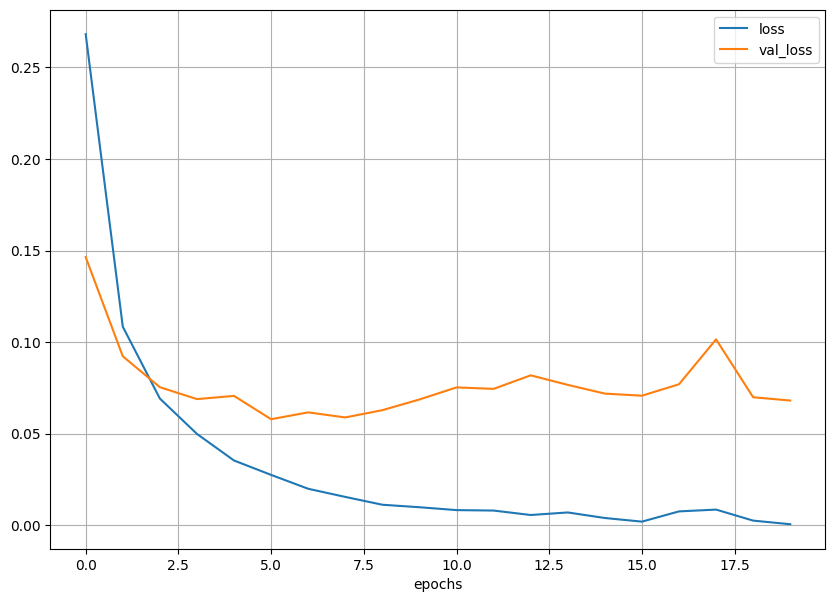

In [ ]:
pd.DataFrame({'loss': history.history['loss'],
              'val_loss': history.history['val_loss']}).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel("epochs")
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0680 - accuracy: 0.9843 - precision: 0.9850


[0.06802649796009064, 0.9843000173568726, 0.9849879741668701]

### Optimizador nadam
- Cantidad de neuronas: 512
- Tipo de optimizador: **nadam**
- Funciones de activación: relu, softmax
- Funciones de pérdida: categorical_crossentropy
- Tamaños de entrada de la imagen: 28*28

In [ ]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='nadam',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision'])

In [ ]:
x_train = train_data_df
#x_train = train_data.reshape((60000,28*28))
x_train = x_train.astype('float32')/255

x_test = test_data.reshape((10000,28*28))
x_test = x_test.astype('float32')/255

In [ ]:
y_train = to_categorical(train_labels)
y_test =to_categorical(test_labels)

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 9s 15ms/step - loss: 0.2694 - accuracy: 0.9263 - precision: 0.9560 - val_loss: 0.1304 - val_accuracy: 0.9604 - val_precision: 0.9694
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1083 - accuracy: 0.9686 - precision: 0.9750 - val_loss: 0.0977 - val_accuracy: 0.9703 - val_precision: 0.9756
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0693 - accuracy: 0.9798 - precision: 0.9834 - val_loss: 0.0755 - val_accuracy: 0.9765 - val_precision: 0.9805
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0495 - accuracy: 0.9854 - precision: 0.9878 - val_loss: 0.0681 - val_accuracy: 0.9781 - val_precision: 0.9813
Epoch 5/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0366 - accuracy: 0.9896 - precision: 0.9915 - val_loss: 0.0658 - val_accuracy: 0.9789 - val_precision: 0.9816
Epoch 6/20
469/469 [==============================] - 5s 11ms/ste

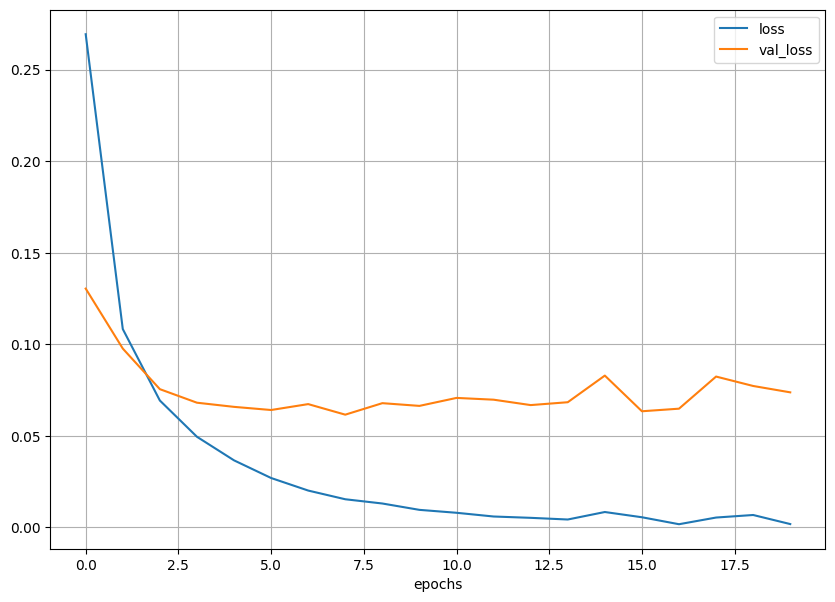

In [ ]:
pd.DataFrame({'loss': history.history['loss'],
              'val_loss': history.history['val_loss']}).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel("epochs")
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0738 - accuracy: 0.9821 - precision: 0.9825


[0.07377190887928009, 0.9821000099182129, 0.9824860095977783]

### Opimizador adadelta
- Cantidad de neuronas: 512
- Tipo de optimizador: **adadelta**
- Funciones de activación: relu, softmax
- Funciones de pérdida: categorical_crossentropy
- Tamaños de entrada de la imagen: 28*28

In [ ]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='adadelta',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision'])

In [ ]:
x_train = train_data_df
#x_train = train_data.reshape((60000,28*28))
x_train = x_train.astype('float32')/255

x_test = test_data.reshape((10000,28*28))
x_test = x_test.astype('float32')/255

In [ ]:
y_train = to_categorical(train_labels)
y_test =to_categorical(test_labels)

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 7s 12ms/step - loss: 2.2443 - accuracy: 0.1790 - precision: 0.0000e+00 - val_loss: 2.1697 - val_accuracy: 0.2669 - val_precision: 0.0000e+00
Epoch 2/20
469/469 [==============================] - 7s 15ms/step - loss: 2.1056 - accuracy: 0.3722 - precision: 0.0000e+00 - val_loss: 2.0323 - val_accuracy: 0.4707 - val_precision: 0.0000e+00
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 1.9750 - accuracy: 0.5192 - precision: 1.0000 - val_loss: 1.9030 - val_accuracy: 0.5845 - val_precision: 1.0000
Epoch 4/20
469/469 [==============================] - 7s 14ms/step - loss: 1.8520 - accuracy: 0.6070 - precision: 1.0000 - val_loss: 1.7811 - val_accuracy: 0.6475 - val_precision: 1.0000
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 1.7360 - accuracy: 0.6624 - precision: 1.0000 - val_loss: 1.6663 - val_accuracy: 0.6935 - val_precision: 1.0000
Epoch 6/20
469/469 [=============================

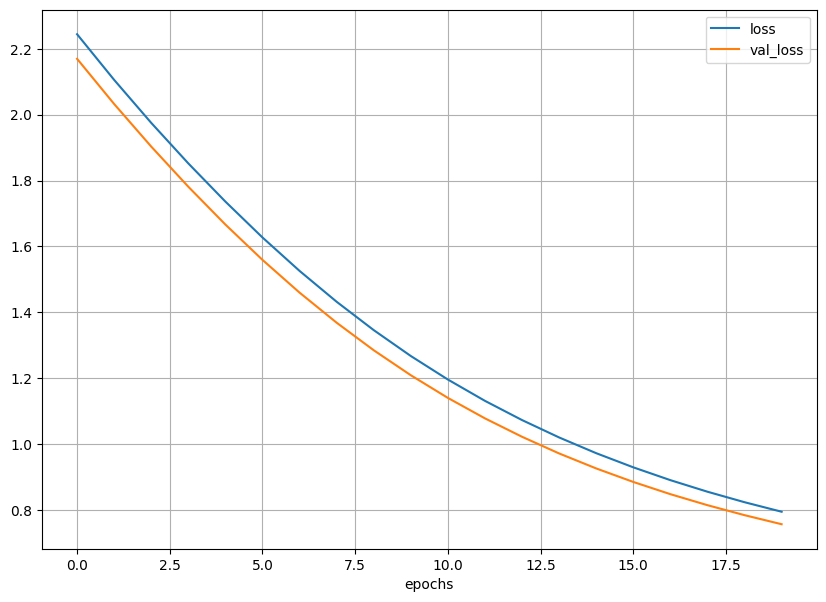

In [ ]:
pd.DataFrame({'loss': history.history['loss'],
              'val_loss': history.history['val_loss']}).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel("epochs")
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7562 - accuracy: 0.8479 - precision: 0.9780


[0.756176233291626, 0.8478999733924866, 0.977975070476532]

# Modificaciones de funciones de activación

### tanh
- Cantidad de neuronas: 512
- Tipo de optimizador: rmsprop
- Funciones de activación: **tanh**, softmax
- Funciones de pérdida: Binary Cross Entropy
- Tamaños de entrada de la imagen: 28*28



In [ ]:
model = models.Sequential()
model.add(layers.Dense(512,activation='tanh', input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision'])

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 11s 22ms/step - loss: 0.3400 - accuracy: 0.9014 - precision: 0.9316 - val_loss: 0.2430 - val_accuracy: 0.9309 - val_precision: 0.9446
Epoch 2/20
469/469 [==============================] - 9s 20ms/step - loss: 0.1824 - accuracy: 0.9474 - precision: 0.9580 - val_loss: 0.1503 - val_accuracy: 0.9570 - val_precision: 0.9653
Epoch 3/20
469/469 [==============================] - 10s 21ms/step - loss: 0.1237 - accuracy: 0.9639 - precision: 0.9705 - val_loss: 0.1238 - val_accuracy: 0.9631 - val_precision: 0.9688
Epoch 4/20
469/469 [==============================] - 9s 20ms/step - loss: 0.0912 - accuracy: 0.9728 - precision: 0.9774 - val_loss: 0.0883 - val_accuracy: 0.9724 - val_precision: 0.9757
Epoch 5/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0709 - accuracy: 0.9789 - precision: 0.9827 - val_loss: 0.0809 - val_accuracy: 0.9746 - val_precision: 0.9787
Epoch 6/20
469/469 [==============================] - 8s 17ms/s

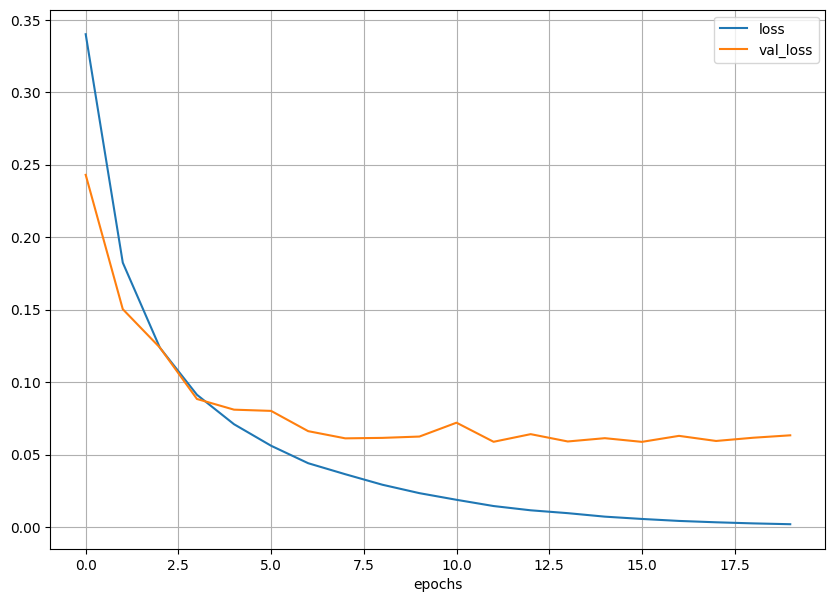

In [ ]:
pd.DataFrame({'loss': history.history['loss'],
              'val_loss': history.history['val_loss']}).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel("epochs")
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0632 - accuracy: 0.9826 - precision: 0.9836


[0.06324885040521622, 0.9825999736785889, 0.9835770130157471]

### swish
- Cantidad de neuronas: 512
- Tipo de optimizador: rmsprop
- Funciones de activación: **swish**, softmax
- Funciones de pérdida: Binary Cross Entropy
- Tamaños de entrada de la imagen: 28*28



In [ ]:
model = models.Sequential()
model.add(layers.Dense(512,activation='swish', input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision'])

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 0.3176 - accuracy: 0.9089 - precision: 0.9415 - val_loss: 0.1613 - val_accuracy: 0.9537 - val_precision: 0.9656
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1336 - accuracy: 0.9615 - precision: 0.9688 - val_loss: 0.1083 - val_accuracy: 0.9668 - val_precision: 0.9725
Epoch 3/20
469/469 [==============================] - 5s 12ms/step - loss: 0.0873 - accuracy: 0.9742 - precision: 0.9785 - val_loss: 0.0868 - val_accuracy: 0.9744 - val_precision: 0.9773
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0634 - accuracy: 0.9809 - precision: 0.9837 - val_loss: 0.0803 - val_accuracy: 0.9759 - val_precision: 0.9792
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0488 - accuracy: 0.9857 - precision: 0.9874 - val_loss: 0.0673 - val_accuracy: 0.9795 - val_precision: 0.9820
Epoch 6/20
469/469 [==============================] - 6s 14ms/ste

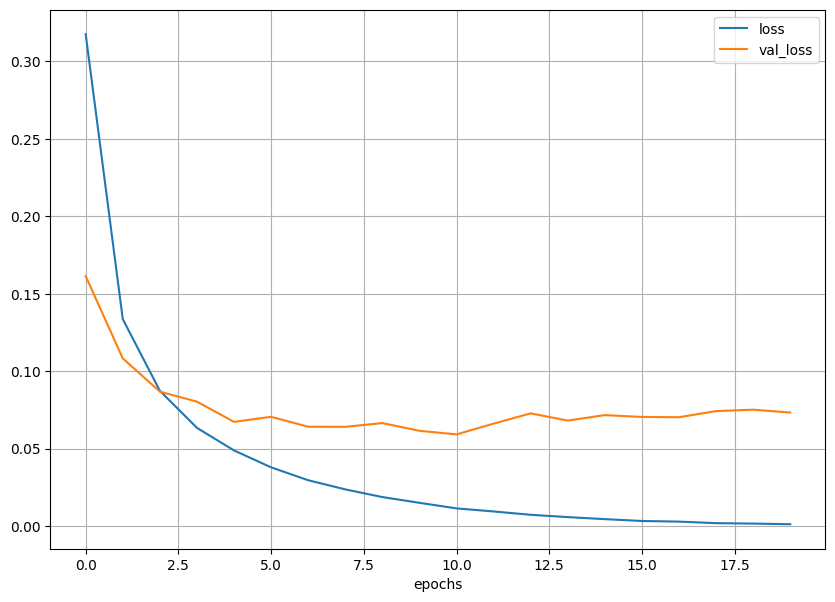

In [ ]:
pd.DataFrame({'loss': history.history['loss'],
              'val_loss': history.history['val_loss']}).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel("epochs")
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0733 - accuracy: 0.9828 - precision: 0.9834


[0.07330258190631866, 0.9828000068664551, 0.9833833575248718]

### ELU
- Cantidad de neuronas: 512
- Tipo de optimizador: rmsprop
- Funciones de activación: **elu**, softmax
- Funciones de pérdida: Binary Cross Entropy
- Tamaños de entrada de la imagen: 28*28



In [ ]:
model = models.Sequential()
model.add(layers.Dense(512,activation='elu', input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision'])

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 7s 14ms/step - loss: 0.3491 - accuracy: 0.8979 - precision: 0.9289 - val_loss: 0.2412 - val_accuracy: 0.9259 - val_precision: 0.9405
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1885 - accuracy: 0.9450 - precision: 0.9553 - val_loss: 0.1594 - val_accuracy: 0.9531 - val_precision: 0.9612
Epoch 3/20
469/469 [==============================] - 7s 16ms/step - loss: 0.1256 - accuracy: 0.9626 - precision: 0.9693 - val_loss: 0.1136 - val_accuracy: 0.9653 - val_precision: 0.9716
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0935 - accuracy: 0.9723 - precision: 0.9769 - val_loss: 0.0853 - val_accuracy: 0.9736 - val_precision: 0.9779
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0749 - accuracy: 0.9768 - precision: 0.9802 - val_loss: 0.0932 - val_accuracy: 0.9703 - val_precision: 0.9735
Epoch 6/20
469/469 [==============================] - 5s 11ms/ste

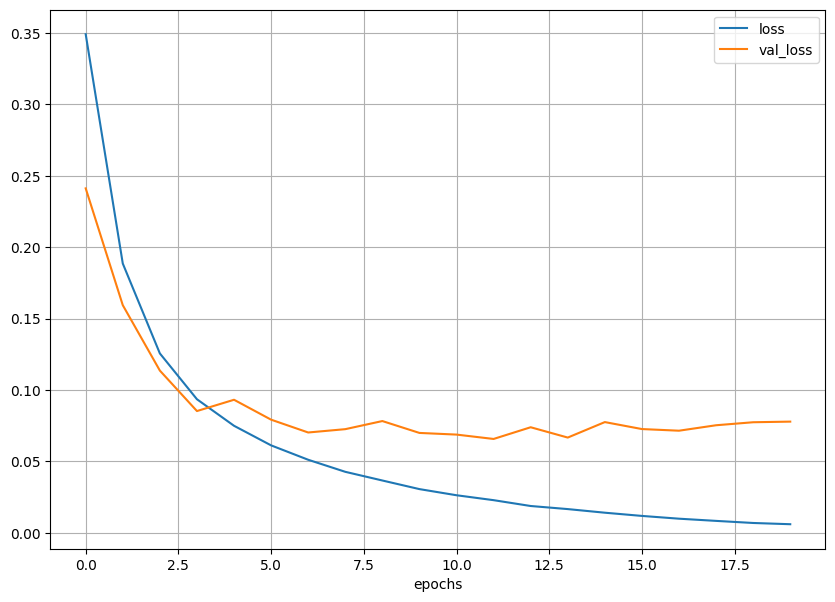

In [ ]:
pd.DataFrame({'loss': history.history['loss'],
              'val_loss': history.history['val_loss']}).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel("epochs")
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0779 - accuracy: 0.9811 - precision: 0.9819


[0.07785345613956451, 0.9811000227928162, 0.9818727970123291]

### SELU
- Cantidad de neuronas: 512
- Tipo de optimizador: rmsprop
- Funciones de activación: **selu**, softmax
- Funciones de pérdida: Binary Cross Entropy
- Tamaños de entrada de la imagen: 28*28



In [ ]:
model = models.Sequential()
model.add(layers.Dense(512,activation='selu', input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision'])

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 7s 13ms/step - loss: 0.3746 - accuracy: 0.8905 - precision: 0.9201 - val_loss: 0.2754 - val_accuracy: 0.9161 - val_precision: 0.9315
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2374 - accuracy: 0.9312 - precision: 0.9441 - val_loss: 0.1924 - val_accuracy: 0.9451 - val_precision: 0.9541
Epoch 3/20
469/469 [==============================] - 7s 14ms/step - loss: 0.1693 - accuracy: 0.9505 - precision: 0.9598 - val_loss: 0.1624 - val_accuracy: 0.9500 - val_precision: 0.9587
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1265 - accuracy: 0.9629 - precision: 0.9691 - val_loss: 0.1149 - val_accuracy: 0.9656 - val_precision: 0.9705
Epoch 5/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0989 - accuracy: 0.9704 - precision: 0.9751 - val_loss: 0.0986 - val_accuracy: 0.9697 - val_precision: 0.9742
Epoch 6/20
469/469 [==============================] - 5s 11ms/ste

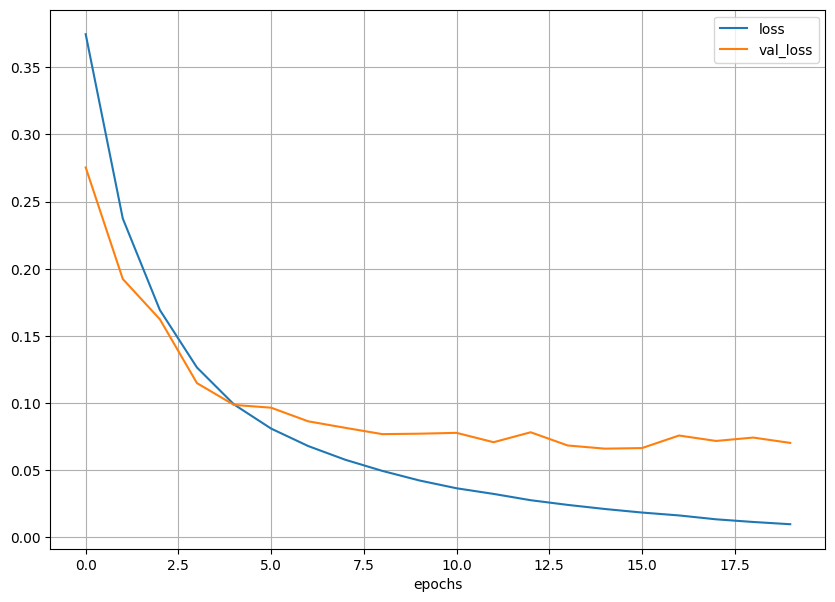

In [ ]:
pd.DataFrame({'loss': history.history['loss'],
              'val_loss': history.history['val_loss']}).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel("epochs")
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0703 - accuracy: 0.9815 - precision: 0.9822


[0.07033117115497589, 0.9815000295639038, 0.9821786284446716]

# Modificaciones de funciones de pérdida

### kullback_leibler_divergence
- Cantidad de neuronas: 512
- Tipo de optimizador: rmsprop
- Funciones de activación: relu, softmax
- Funciones de pérdida: **kullback_leibler_divergence**
- Tamaños de entrada de la imagen: 28*28



In [ ]:
from keras.losses import kullback_leibler_divergence

model = models.Sequential()
model.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))



model.compile(optimizer='rmsprop',
              loss='kullback_leibler_divergence',
              metrics=['accuracy', 'Precision'])

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 43s 91ms/step - loss: 0.2674 - accuracy: 0.9233 - precision: 0.9525 - val_loss: 0.1472 - val_accuracy: 0.9564 - val_precision: 0.9634
Epoch 2/20
469/469 [==============================] - 9s 19ms/step - loss: 0.1074 - accuracy: 0.9682 - precision: 0.9746 - val_loss: 0.0887 - val_accuracy: 0.9740 - val_precision: 0.9777
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0703 - accuracy: 0.9789 - precision: 0.9822 - val_loss: 0.0783 - val_accuracy: 0.9755 - val_precision: 0.9786
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0511 - accuracy: 0.9845 - precision: 0.9869 - val_loss: 0.0723 - val_accuracy: 0.9778 - val_precision: 0.9801
Epoch 5/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0382 - accuracy: 0.9883 - precision: 0.9899 - val_loss: 0.0652 - val_accuracy: 0.9804 - val_precision: 0.9823
Epoch 6/20
469/469 [==============================] - 7s 14ms/st

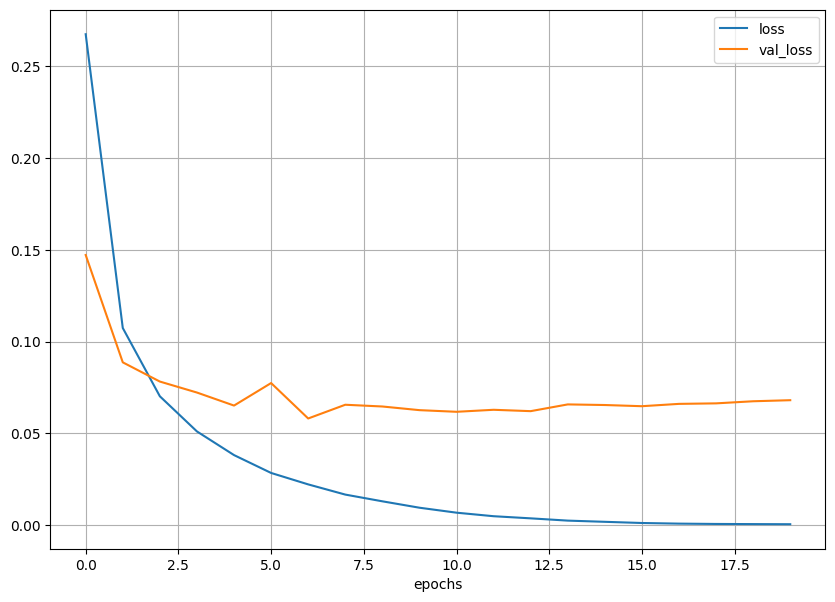

In [ ]:
pd.DataFrame({'loss': history.history['loss'],
              'val_loss': history.history['val_loss']}).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel("epochs")
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0681 - accuracy: 0.9839 - precision: 0.9846


[0.06812863051891327, 0.9839000105857849, 0.9845830202102661]

### Categorical_hinge
- Cantidad de neuronas: 512
- Tipo de optimizador: rmsprop
- Funciones de activación: relu, softmax
- Funciones de pérdida: **categorical_hinge**
- Tamaños de entrada de la imagen: 28*28



In [ ]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_hinge',
              metrics=['accuracy', 'Precision'])

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 7s 12ms/step - loss: 0.2351 - accuracy: 0.8951 - precision: 0.9328 - val_loss: 0.1264 - val_accuracy: 0.9434 - val_precision: 0.9486
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1066 - accuracy: 0.9528 - precision: 0.9573 - val_loss: 0.0934 - val_accuracy: 0.9591 - val_precision: 0.9621
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0768 - accuracy: 0.9667 - precision: 0.9694 - val_loss: 0.0696 - val_accuracy: 0.9695 - val_precision: 0.9717
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0604 - accuracy: 0.9734 - precision: 0.9752 - val_loss: 0.0624 - val_accuracy: 0.9724 - val_precision: 0.9741
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0500 - accuracy: 0.9784 - precision: 0.9798 - val_loss: 0.0597 - val_accuracy: 0.9739 - val_precision: 0.9754
Epoch 6/20
469/469 [==============================] - 6s 12ms/ste

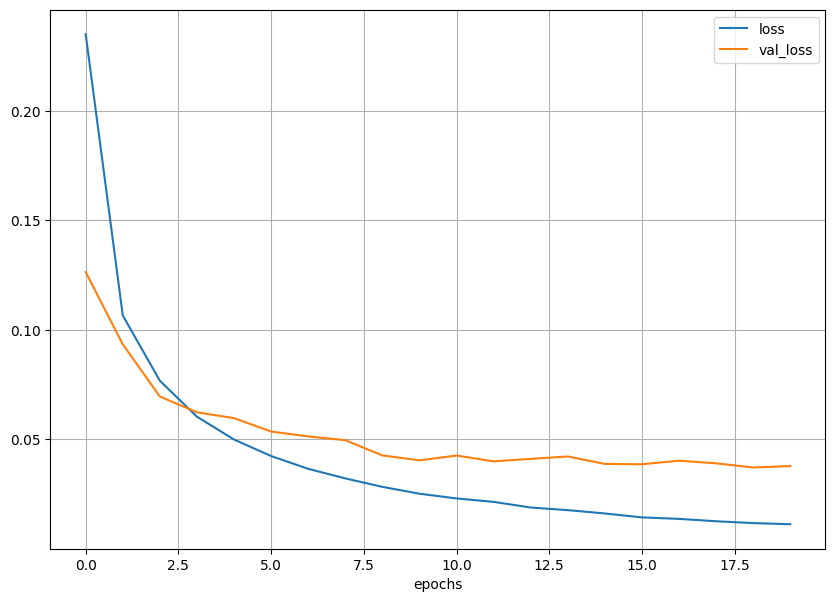

In [ ]:
pd.DataFrame({'loss': history.history['loss'],
              'val_loss': history.history['val_loss']}).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel("epochs")
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0378 - accuracy: 0.9816 - precision: 0.9820


[0.037835489958524704, 0.9815999865531921, 0.9819874167442322]

### MeanSquaredError
- Cantidad de neuronas: 512
- Tipo de optimizador: rmsprop
- Funciones de activación: relu, softmax
- Funciones de pérdida: **mean_squared_error**
- Tamaños de entrada de la imagen: 28*28



In [ ]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))



model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['accuracy', 'Precision'])

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 7s 13ms/step - loss: 0.0186 - accuracy: 0.8869 - precision: 0.9510 - val_loss: 0.0113 - val_accuracy: 0.9281 - val_precision: 0.9524
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0098 - accuracy: 0.9392 - precision: 0.9596 - val_loss: 0.0083 - val_accuracy: 0.9483 - val_precision: 0.9638
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0075 - accuracy: 0.9535 - precision: 0.9687 - val_loss: 0.0067 - val_accuracy: 0.9586 - val_precision: 0.9694
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0061 - accuracy: 0.9629 - precision: 0.9744 - val_loss: 0.0059 - val_accuracy: 0.9628 - val_precision: 0.9731
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0052 - accuracy: 0.9688 - precision: 0.9789 - val_loss: 0.0053 - val_accuracy: 0.9667 - val_precision: 0.9763
Epoch 6/20
469/469 [==============================] - 6s 13ms/ste

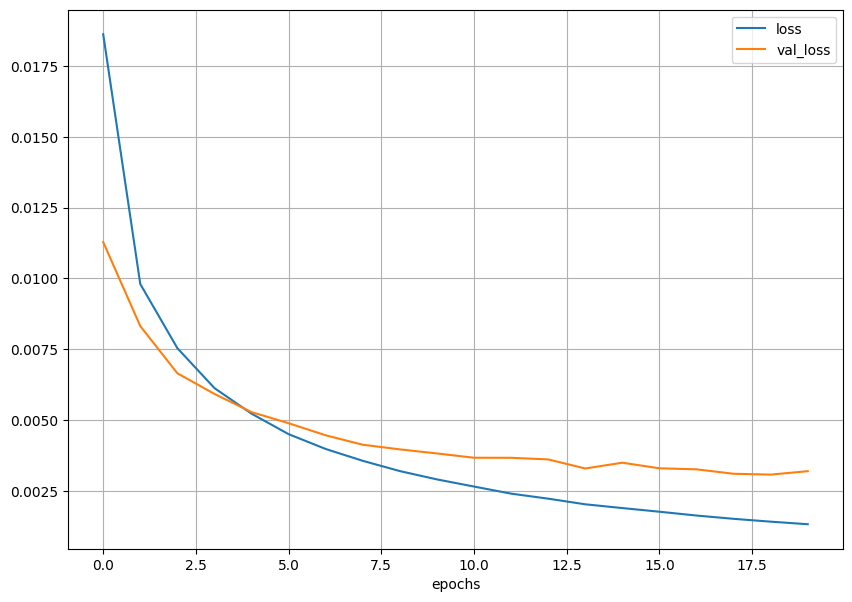

In [ ]:
pd.DataFrame({'loss': history.history['loss'],
              'val_loss': history.history['val_loss']}).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel("epochs")
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0032 - accuracy: 0.9794 - precision: 0.9829


[0.003199949860572815, 0.9793999791145325, 0.982883632183075]

### CategoricalCrossentropy
- Cantidad de neuronas: 512
- Tipo de optimizador: rmsprop
- Funciones de activación: relu, softmax
- Funciones de pérdida: **CategoricalCrossentropy()**
- Tamaños de entrada de la imagen: 28*28



In [ ]:
from keras.losses import CategoricalCrossentropy

model = models.Sequential()
model.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))



model.compile(optimizer='rmsprop',
              loss=CategoricalCrossentropy(),
              metrics=['accuracy', 'Precision'])

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 8s 14ms/step - loss: 0.2656 - accuracy: 0.9231 - precision: 0.9519 - val_loss: 0.1477 - val_accuracy: 0.9549 - val_precision: 0.9643
Epoch 2/20
469/469 [==============================] - 9s 19ms/step - loss: 0.1073 - accuracy: 0.9680 - precision: 0.9744 - val_loss: 0.0977 - val_accuracy: 0.9694 - val_precision: 0.9755
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0707 - accuracy: 0.9786 - precision: 0.9819 - val_loss: 0.0738 - val_accuracy: 0.9777 - val_precision: 0.9816
Epoch 4/20
469/469 [==============================] - 5s 12ms/step - loss: 0.0521 - accuracy: 0.9846 - precision: 0.9867 - val_loss: 0.0681 - val_accuracy: 0.9797 - val_precision: 0.9820
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0383 - accuracy: 0.9885 - precision: 0.9900 - val_loss: 0.0619 - val_accuracy: 0.9814 - val_precision: 0.9839
Epoch 6/20
469/469 [==============================] - 5s 10ms/ste

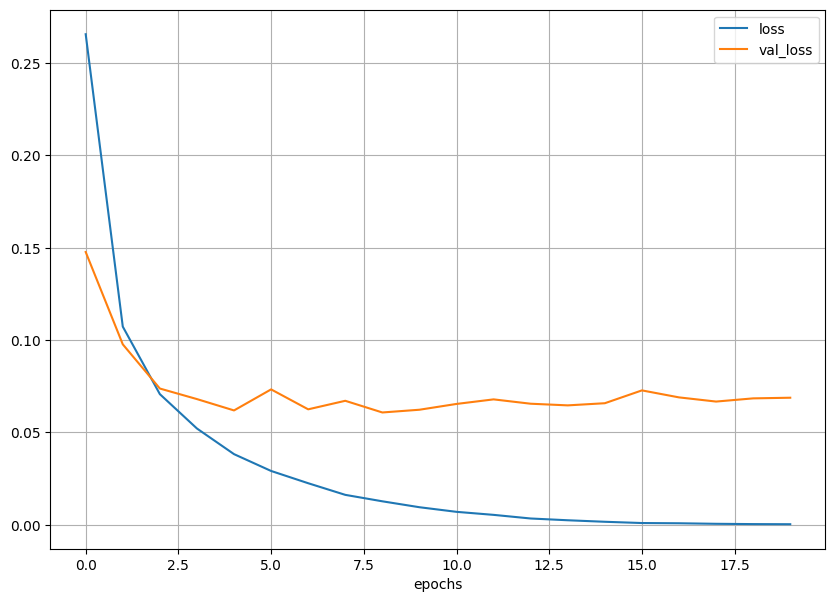

In [ ]:
pd.DataFrame({'loss': history.history['loss'],
              'val_loss': history.history['val_loss']}).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel("epochs")
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0688 - accuracy: 0.9840 - precision: 0.9845


[0.06881081312894821, 0.984000027179718, 0.984490692615509]

# Modificaciones de tamaños de entrada de la imagen.


### Imagenes 12 x 12
- Cantidad de neuronas: 512
- Tipo de optimizador: rmsprop
- Funciones de activación: relu, softmax
- Funciones de pérdida: Binary Cross Entropy
- Tamaños de entrada de la imagen: 12*12


In [ ]:
from PIL import Image

# Nuevo tamaño de entrada
nuevo_tamaño = (12, 12)  # Cambia esto al tamaño deseado

# Cargar el conjunto de datos MNIST
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# Función para redimensionar un conjunto de datos
def redimensionar_conjunto_datos(conjunto_datos):
    imagenes_redimensionadas = []
    for imagen in conjunto_datos:
        imagen_pil = Image.fromarray(imagen)
        imagen_redimensionada = imagen_pil.resize(nuevo_tamaño)
        imagenes_redimensionadas.append(np.array(imagen_redimensionada))
    return np.array(imagenes_redimensionadas)

# Redimensiona el conjunto de datos de entrenamiento
train_data = redimensionar_conjunto_datos(train_data)

# Redimensiona el conjunto de datos de prueba
test_data = redimensionar_conjunto_datos(test_data)

# Aplana las imágenes redimensionadas y conviértelas en un DataFrame
train_data_flattened = train_data.reshape(train_data.shape[0], -1)
train_data_df = pd.DataFrame(train_data_flattened)

In [ ]:
train_data_df.shape

(60000, 144)

In [ ]:
train_data.shape

(60000, 12, 12)

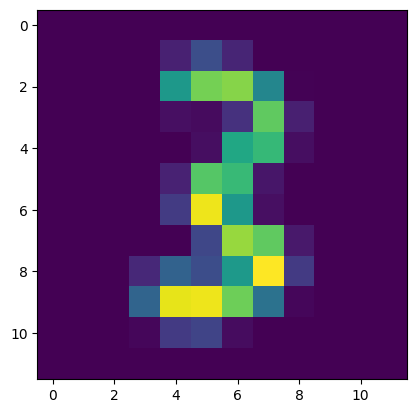

In [ ]:
plt.imshow(train_data[50000]) #De 0 a 59.999

In [ ]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu', input_shape=(12*12,)))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision'])

In [ ]:
x_train = train_data_df
x_train = x_train.astype('float32')/255

x_test = test_data.reshape((10000,12*12))
x_test = x_test.astype('float32')/255

In [ ]:
y_train = to_categorical(train_labels)
y_test =to_categorical(test_labels)

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 6s 10ms/step - loss: 0.4138 - accuracy: 0.8954 - precision: 0.9453 - val_loss: 0.2165 - val_accuracy: 0.9378 - val_precision: 0.9545
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1904 - accuracy: 0.9453 - precision: 0.9586 - val_loss: 0.1525 - val_accuracy: 0.9565 - val_precision: 0.9663
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1394 - accuracy: 0.9595 - precision: 0.9679 - val_loss: 0.1228 - val_accuracy: 0.9642 - val_precision: 0.9695
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1111 - accuracy: 0.9675 - precision: 0.9739 - val_loss: 0.1005 - val_accuracy: 0.9708 - val_precision: 0.9766
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0934 - accuracy: 0.9727 - precision: 0.9778 - val_loss: 0.0883 - val_accuracy: 0.9742 - val_precision: 0.9777
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - l

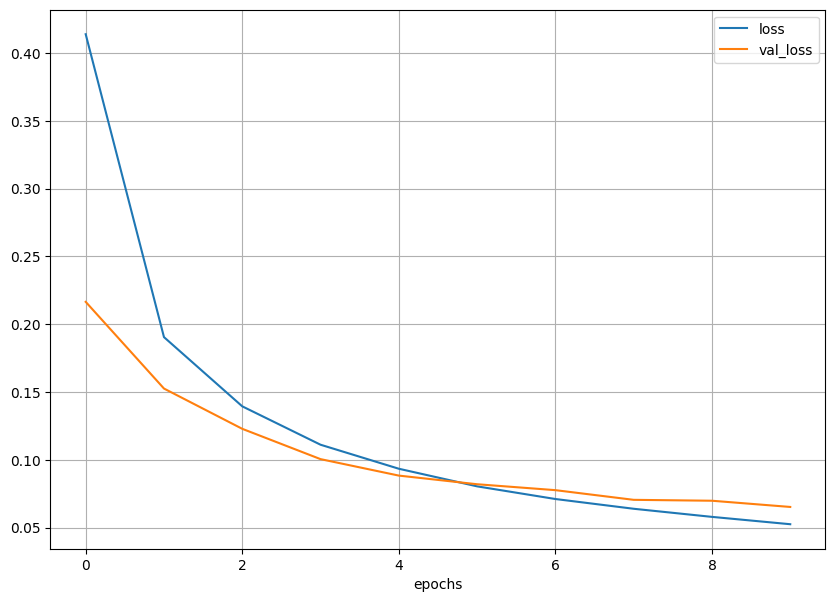

In [ ]:
pd.DataFrame({'loss': history.history['loss'],
              'val_loss': history.history['val_loss']}).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel("epochs")
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0652 - accuracy: 0.9795 - precision: 0.9819


[0.06520058214664459, 0.9794999957084656, 0.9819168448448181]

### Imagenes 22 x 22
- Cantidad de neuronas: 512
- Tipo de optimizador: rmsprop
- Funciones de activación: relu, softmax
- Funciones de pérdida: Binary Cross Entropy
- Tamaños de entrada de la imagen: 22*22


In [ ]:
from PIL import Image

# Nuevo tamaño de entrada
nuevo_tamaño = (22, 22)  # Cambia esto al tamaño deseado

# Cargar el conjunto de datos MNIST
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# Función para redimensionar un conjunto de datos
def redimensionar_conjunto_datos(conjunto_datos):
    imagenes_redimensionadas = []
    for imagen in conjunto_datos:
        imagen_pil = Image.fromarray(imagen)
        imagen_redimensionada = imagen_pil.resize(nuevo_tamaño)
        imagenes_redimensionadas.append(np.array(imagen_redimensionada))
    return np.array(imagenes_redimensionadas)

# Redimensiona el conjunto de datos de entrenamiento
train_data = redimensionar_conjunto_datos(train_data)

# Redimensiona el conjunto de datos de prueba
test_data = redimensionar_conjunto_datos(test_data)

# Aplana las imágenes redimensionadas y conviértelas en un DataFrame
train_data_flattened = train_data.reshape(train_data.shape[0], -1)
train_data_df = pd.DataFrame(train_data_flattened)

In [ ]:
train_data_df.shape

(60000, 484)

In [ ]:
train_data.shape

(60000, 22, 22)

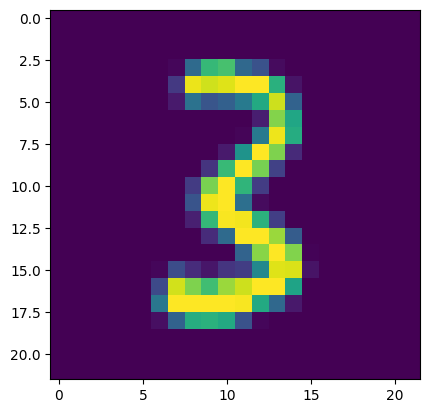

In [ ]:
plt.imshow(train_data[50000]) #De 0 a 59.999

In [ ]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu', input_shape=(22*22,)))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision'])

In [ ]:
x_train = train_data_df
x_train = x_train.astype('float32')/255

x_test = test_data.reshape((10000,22*22))
x_test = x_test.astype('float32')/255

In [ ]:
y_train = to_categorical(train_labels)
y_test =to_categorical(test_labels)

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 6s 11ms/step - loss: 0.2956 - accuracy: 0.9173 - precision: 0.9507 - val_loss: 0.1509 - val_accuracy: 0.9560 - val_precision: 0.9667
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1268 - accuracy: 0.9634 - precision: 0.9712 - val_loss: 0.1050 - val_accuracy: 0.9673 - val_precision: 0.9740
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0863 - accuracy: 0.9746 - precision: 0.9795 - val_loss: 0.0764 - val_accuracy: 0.9762 - val_precision: 0.9796
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0651 - accuracy: 0.9804 - precision: 0.9834 - val_loss: 0.0669 - val_accuracy: 0.9795 - val_precision: 0.9824
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0520 - accuracy: 0.9837 - precision: 0.9864 - val_loss: 0.0701 - val_accuracy: 0.9778 - val_precision: 0.9808
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - 

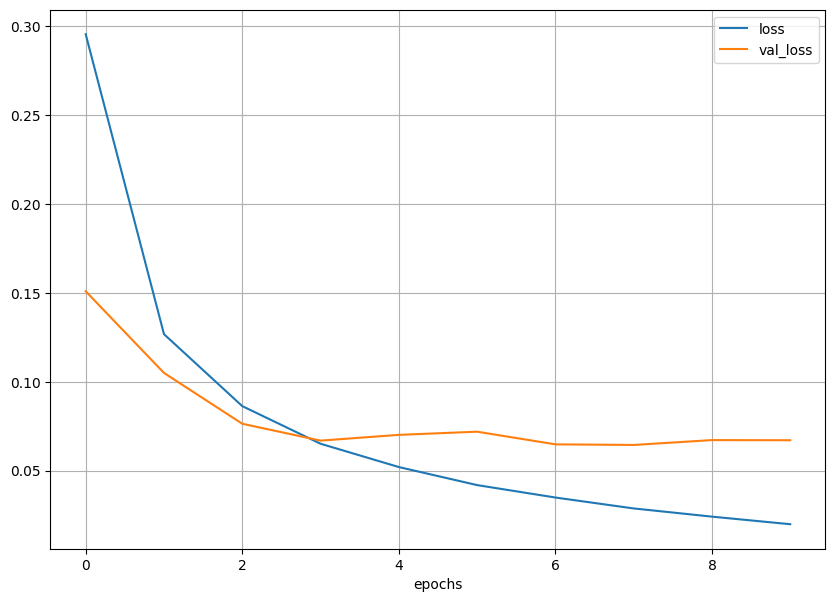

In [ ]:
pd.DataFrame({'loss': history.history['loss'],
              'val_loss': history.history['val_loss']}).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel("epochs")
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0671 - accuracy: 0.9802 - precision: 0.9814


[0.06707140803337097, 0.9801999926567078, 0.9813514947891235]

### Imagenes 36 x 36
- Cantidad de neuronas: 512
- Tipo de optimizador: rmsprop
- Funciones de activación: relu, softmax
- Funciones de pérdida: Binary Cross Entropy
- Tamaños de entrada de la imagen: 36*36


In [ ]:
from PIL import Image

# Nuevo tamaño de entrada
nuevo_tamaño = (36, 36)  # Cambia esto al tamaño deseado

# Cargar el conjunto de datos MNIST
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# Función para redimensionar un conjunto de datos
def redimensionar_conjunto_datos(conjunto_datos):
    imagenes_redimensionadas = []
    for imagen in conjunto_datos:
        imagen_pil = Image.fromarray(imagen)
        imagen_redimensionada = imagen_pil.resize(nuevo_tamaño)
        imagenes_redimensionadas.append(np.array(imagen_redimensionada))
    return np.array(imagenes_redimensionadas)

# Redimensiona el conjunto de datos de entrenamiento
train_data = redimensionar_conjunto_datos(train_data)

# Redimensiona el conjunto de datos de prueba
test_data = redimensionar_conjunto_datos(test_data)

# Aplana las imágenes redimensionadas y conviértelas en un DataFrame
train_data_flattened = train_data.reshape(train_data.shape[0], -1)
train_data_df = pd.DataFrame(train_data_flattened)

In [ ]:
train_data_df.shape

(60000, 1296)

In [ ]:
train_data.shape

(60000, 36, 36)

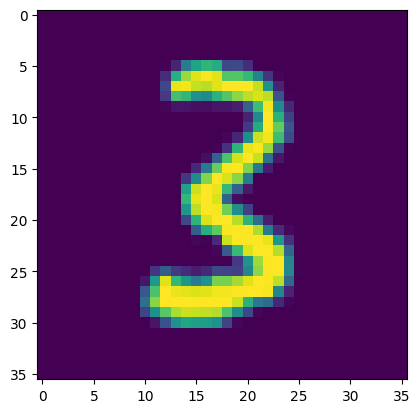

In [ ]:
plt.imshow(train_data[50000]) #De 0 a 59.999

In [ ]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu', input_shape=(36*36,)))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision'])

In [ ]:
x_train = train_data_df
x_train = x_train.astype('float32')/255

x_test = test_data.reshape((10000,36*36))
x_test = x_test.astype('float32')/255

In [ ]:
y_train = to_categorical(train_labels)
y_test =to_categorical(test_labels)

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 13s 25ms/step - loss: 0.2412 - accuracy: 0.9273 - precision: 0.9515 - val_loss: 0.1180 - val_accuracy: 0.9619 - val_precision: 0.9692
Epoch 2/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0964 - accuracy: 0.9714 - precision: 0.9761 - val_loss: 0.0849 - val_accuracy: 0.9735 - val_precision: 0.9763
Epoch 3/10
469/469 [==============================] - 8s 18ms/step - loss: 0.0644 - accuracy: 0.9808 - precision: 0.9831 - val_loss: 0.0700 - val_accuracy: 0.9786 - val_precision: 0.9817
Epoch 4/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0473 - accuracy: 0.9857 - precision: 0.9873 - val_loss: 0.0773 - val_accuracy: 0.9766 - val_precision: 0.9793
Epoch 5/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0361 - accuracy: 0.9884 - precision: 0.9897 - val_loss: 0.0586 - val_accuracy: 0.9821 - val_precision: 0.9841
Epoch 6/10
469/469 [==============================] - 12s 25ms/

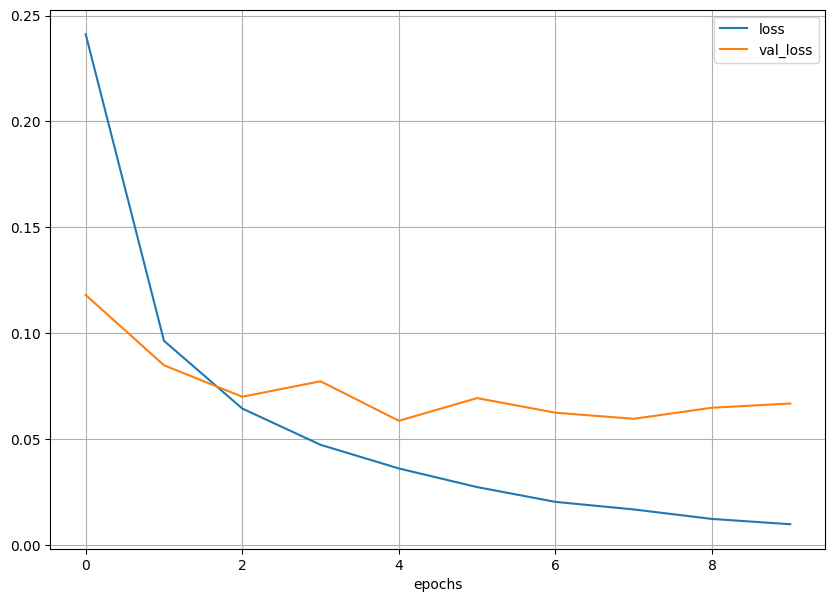

In [ ]:
pd.DataFrame({'loss': history.history['loss'],
              'val_loss': history.history['val_loss']}).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel("epochs")
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0668 - accuracy: 0.9820 - precision: 0.9831


[0.06679273396730423, 0.9819999933242798, 0.9830712080001831]

### Imagenes 52 x 52
- Cantidad de neuronas: 512
- Tipo de optimizador: rmsprop
- Funciones de activación: relu, softmax
- Funciones de pérdida: Binary Cross Entropy
- Tamaños de entrada de la imagen: 52*52


In [ ]:
from PIL import Image

# Nuevo tamaño de entrada
nuevo_tamaño = (52, 52)  # Cambia esto al tamaño deseado

# Cargar el conjunto de datos MNIST
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# Función para redimensionar un conjunto de datos
def redimensionar_conjunto_datos(conjunto_datos):
    imagenes_redimensionadas = []
    for imagen in conjunto_datos:
        imagen_pil = Image.fromarray(imagen)
        imagen_redimensionada = imagen_pil.resize(nuevo_tamaño)
        imagenes_redimensionadas.append(np.array(imagen_redimensionada))
    return np.array(imagenes_redimensionadas)

# Redimensiona el conjunto de datos de entrenamiento
train_data = redimensionar_conjunto_datos(train_data)

# Redimensiona el conjunto de datos de prueba
test_data = redimensionar_conjunto_datos(test_data)

# Aplana las imágenes redimensionadas y conviértelas en un DataFrame
train_data_flattened = train_data.reshape(train_data.shape[0], -1)
train_data_df = pd.DataFrame(train_data_flattened)

In [ ]:
train_data_df.shape

(60000, 2704)

In [ ]:
train_data.shape

(60000, 52, 52)

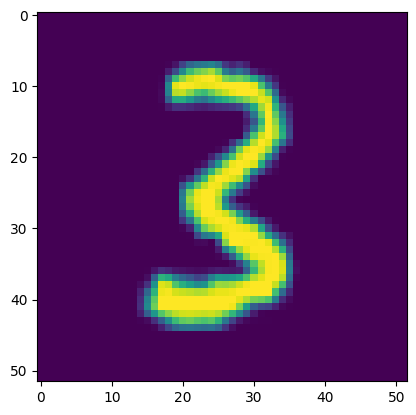

In [ ]:
plt.imshow(train_data[50000]) #De 0 a 59.999

In [ ]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu', input_shape=(52*52,)))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision'])

In [ ]:
x_train = train_data_df
x_train = x_train.astype('float32')/255

x_test = test_data.reshape((10000,52*52))
x_test = x_test.astype('float32')/255

In [ ]:
y_train = to_categorical(train_labels)
y_test =to_categorical(test_labels)

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 19s 38ms/step - loss: 0.2332 - accuracy: 0.9288 - precision: 0.9494 - val_loss: 0.1204 - val_accuracy: 0.9626 - val_precision: 0.9677
Epoch 2/10
469/469 [==============================] - 14s 29ms/step - loss: 0.0877 - accuracy: 0.9730 - precision: 0.9764 - val_loss: 0.0779 - val_accuracy: 0.9770 - val_precision: 0.9798
Epoch 3/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0573 - accuracy: 0.9821 - precision: 0.9844 - val_loss: 0.0799 - val_accuracy: 0.9748 - val_precision: 0.9780
Epoch 4/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0410 - accuracy: 0.9874 - precision: 0.9886 - val_loss: 0.0655 - val_accuracy: 0.9802 - val_precision: 0.9819
Epoch 5/10
469/469 [==============================] - 15s 33ms/step - loss: 0.0321 - accuracy: 0.9898 - precision: 0.9907 - val_loss: 0.0694 - val_accuracy: 0.9804 - val_precision: 0.9821
Epoch 6/10
469/469 [==============================] - 14s 31

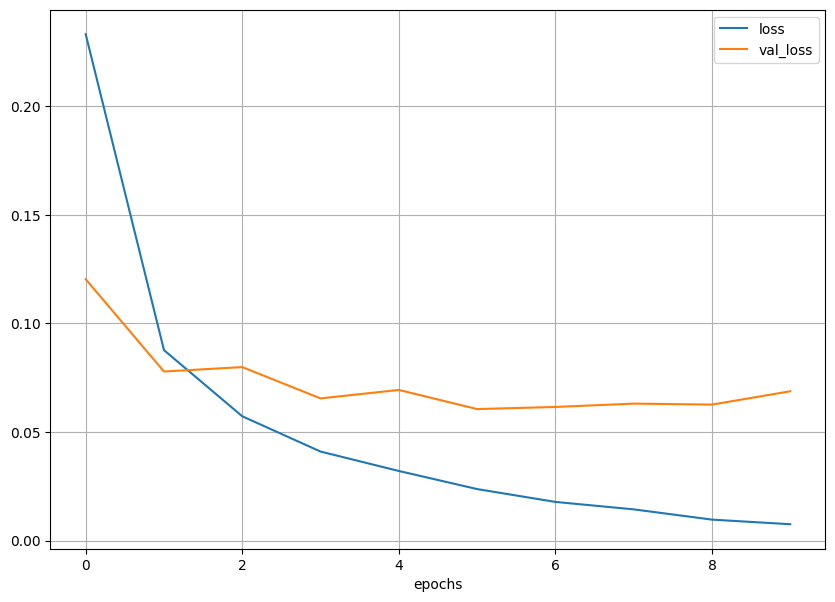

In [ ]:
pd.DataFrame({'loss': history.history['loss'],
              'val_loss': history.history['val_loss']}).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel("epochs")
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0688 - accuracy: 0.9825 - precision: 0.9829


[0.0687977746129036, 0.9825000166893005, 0.9828845858573914]